In [2]:
from langgraph.graph import  StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver
from typing import TypedDict
import time

In [3]:
class state(TypedDict):
    start : str
    step1: str
    step2 : str


In [4]:
def step1(state : state):
    print("step1 ✅")
    return {'step1' : "done"}

def step2(state : state):
    print("Running step2")
    time.sleep(5)
    print("step2✅")
    return {'step2' : "done"}

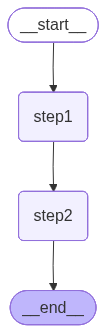

In [18]:
checkpointer = MemorySaver()

graph = StateGraph(state)
graph.add_node("step1", step1)
graph.add_node("step2", step2)

graph.add_edge(START, "step1")
graph.add_edge("step1", "step2")
graph.add_edge("step2", END)

workflow = graph.compile(checkpointer=checkpointer)
workflow


In [6]:
config={'configurable' : {'thread_id' : 1}}

In [25]:
try:
    workflow.invoke({'start': "done"}, config={'configurable' : {'thread_id' : 1}})
except KeyboardInterrupt:
    print("Interrupted")

step1 ✅
Running step2
Interrupted


In [23]:
print("the last checkpoint's state: ")
print(workflow.get_state(config=config))

the last checkpoint's state: 
StateSnapshot(values={'start': 'done', 'step1': 'done'}, next=('step2',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0eb9e2-16fa-69c9-8001-aa8d51a99b12'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2026-01-07T07:54:44.681130+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0eb9e2-16f4-6f20-8000-731c1fbbf2c6'}}, tasks=(PregelTask(id='6ba61f14-c9fc-a42a-3000-4f0e8c89d583', name='step2', path=('__pregel_pull', 'step2'), error=None, interrupts=(), state=None, result=None),), interrupts=())


In [ ]:
workflow

In [26]:
print("the checkpoints recorded🎥 are: ")
for i in list(workflow.get_state_history(config=config)):
    print(i)

the checkpoints recorded🎥 are: 
StateSnapshot(values={'start': 'done', 'step1': 'done'}, next=('step2',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0eb9e7-33b6-6b29-8004-ccecc6b0611f'}}, metadata={'source': 'loop', 'step': 4, 'parents': {}}, created_at='2026-01-07T07:57:01.911915+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0eb9e7-33af-61a2-8003-4961d59518c1'}}, tasks=(PregelTask(id='1eac1807-7df5-49e9-0318-5800a704e718', name='step2', path=('__pregel_pull', 'step2'), error=None, interrupts=(), state=None, result=None),), interrupts=())
StateSnapshot(values={'start': 'done', 'step1': 'done'}, next=('step1',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0eb9e7-33af-61a2-8003-4961d59518c1'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2026-01-07T07:57:01.908802+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_

In [30]:
workflow.invoke(None,config=config)

{'start': 'done', 'step1': 'done', 'step2': 'done'}

In [33]:
print("the checkpoints recorded🎥 are: ")
for i in list(workflow.get_state_history(config=config)):
    print(i)

the checkpoints recorded🎥 are: 
StateSnapshot(values={'start': 'done', 'step1': 'done', 'step2': 'done'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0eb9f3-441c-6f57-8005-116762244d34'}}, metadata={'source': 'loop', 'step': 5, 'parents': {}}, created_at='2026-01-07T08:02:25.754067+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0eb9e7-33b6-6b29-8004-ccecc6b0611f'}}, tasks=(), interrupts=())
StateSnapshot(values={'start': 'done', 'step1': 'done'}, next=('step2',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0eb9e7-33b6-6b29-8004-ccecc6b0611f'}}, metadata={'source': 'loop', 'step': 4, 'parents': {}}, created_at='2026-01-07T07:57:01.911915+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0eb9e7-33af-61a2-8003-4961d59518c1'}}, tasks=(PregelTask(id='1eac1807-7df5-49e9-0318-5800a704e718', name='step2', p